# **☁️🌱 Sky/Ground Segmentation Using Deep Learning**

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('../')

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from lumivid.sky_ground_segmentation.dataset import get_dataloaders
from lumivid.utils.model_utils import get_class_weights, show_learning_curves

IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD = [0.229, 0.224, 0.225]

TRAIN_SPLIT, TEST_SPLIT, VAL_SPLIT = 0.9, 0.095, 0.005
BATCH_SIZE = 1

In [65]:
train_loader, test_loader, val_loader = get_dataloaders(TRAIN_SPLIT, TEST_SPLIT, BATCH_SIZE, use_workers=False)

➡️ Number of Ade20k images: 5000
➡️ Number of Cityscapes images: 3475
➡️ Number of Mapillary Vistas images: 19938
➡️ Number of SkyFinder images: 19700
➡️ Number of Sun2019 images: 6537
➡️ Number of Swimseg images: 10130

➡️ Number of train images: 58302
➡️ Number of test images: 6154
➡️ Number of val images: 324


In [66]:
# Get class weights
# get_class_weights(train_loader, n_classes=2, n_samples=1000)

In [67]:
# Show training sample image
it = iter(train_loader)

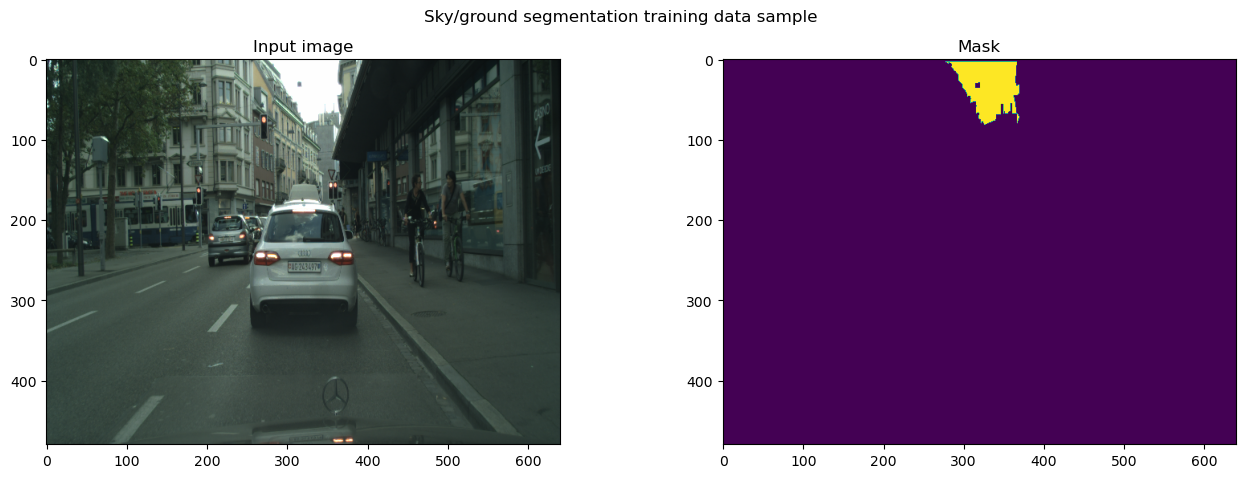

In [68]:
sample_input, sample_mask = next(it)
sample_input = sample_input[0].permute(1, 2, 0).cpu().numpy()
sample_mask = sample_mask[0].permute(1, 2, 0).cpu().numpy()
sample_mask = sample_mask[:, :, 1]

# Normalize back to [0,1]
sample_input = (sample_input * IMAGENET_STD) + IMAGENET_MEAN
sample_input = np.clip(sample_input, 0, 1)

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_input)
plt.title("Input image")
plt.subplot(1, 2, 2)
plt.imshow(sample_mask, vmin=0, vmax=1)
plt.title("Mask")
plt.suptitle("Sky/ground segmentation training data sample")
plt.show()

In [69]:
# Show validation sample image
it = iter(val_loader)

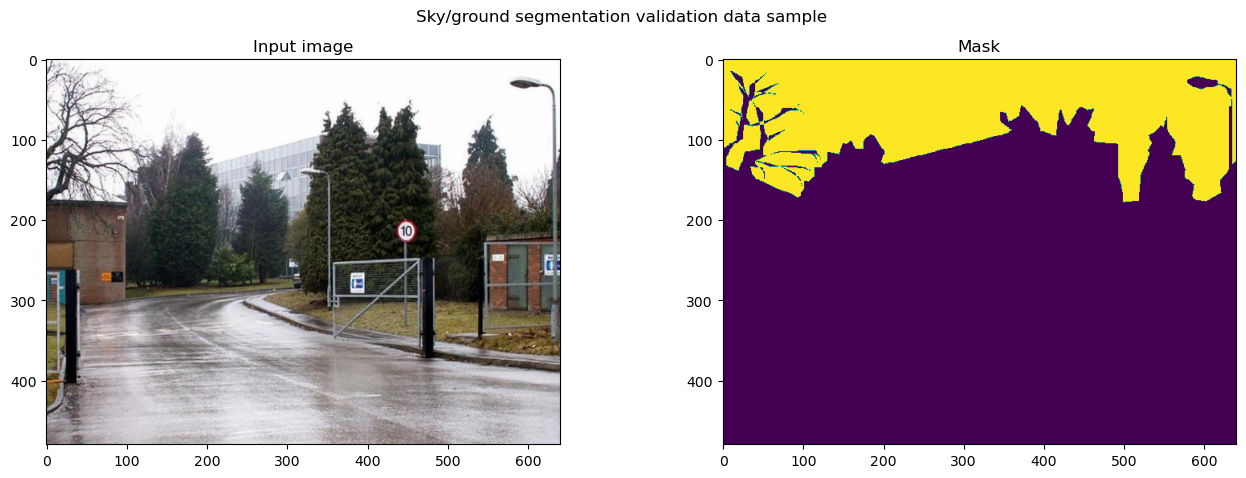

In [70]:
# show from validation set
sample_input, sample_mask = next(it)
sample_input = sample_input[0].permute(1, 2, 0).cpu().numpy()
sample_mask = sample_mask[0].permute(1, 2, 0).cpu().numpy()
sample_mask = sample_mask[:, :, 1]

# Normalize back to [0,1]
sample_input = (sample_input * IMAGENET_STD) + IMAGENET_MEAN
sample_input = np.clip(sample_input, 0, 1)

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_input)
plt.title("Input image")
plt.subplot(1, 2, 2)
plt.imshow(sample_mask, vmin=0, vmax=1)
plt.title("Mask")
plt.suptitle("Sky/ground segmentation validation data sample")
plt.show()

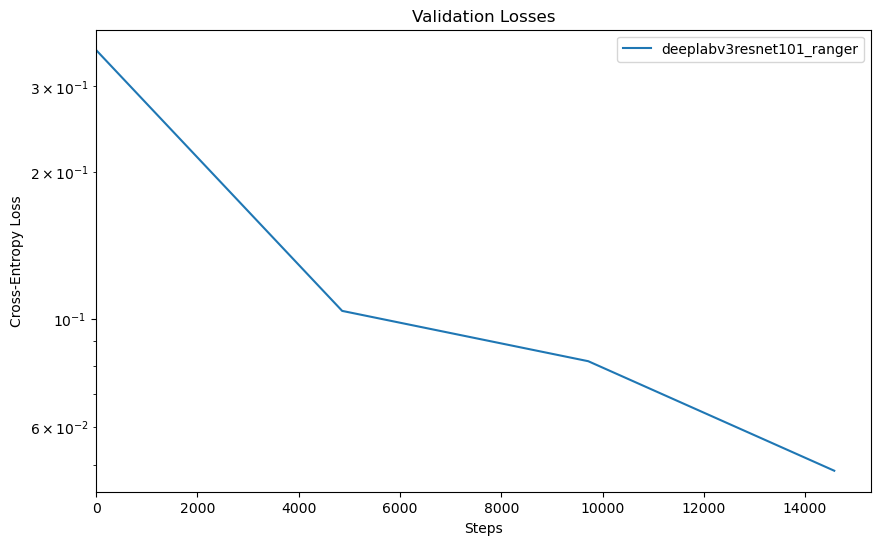

In [11]:
model_file_dir = "../data/sky_ground_segmentation/models/"
show_learning_curves(model_file_dir, default_max_steps=14576, window_size=1)